# Terrorism Data within the US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/allisonhay/Desktop/globalterrorismdb_0617dist.csv',
                 usecols=[0, 1, 2, 3, 8, 11,12, 13, 14, 26, 35,37, 82,84, 100, 103])
df.head()

,eventid,iyear,imonth,iday,country_txt,provstate,city,latitude,longitude,success,targtype1_txt,targsubtype1_txt,weaptype1_txt,weapsubtype1_txt,nkillter,nwoundte
0,197000000001,1970,7,2,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,1,Private Citizens & Property,Named Civilian,Unknown,NaN,NaN,NaN
1,197000000002,1970,0,0,Mexico,NaN,Mexico city,19.432608,-99.133207,1,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,NaN,NaN,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Unknown,15.478598,120.599741,1,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,NaN,NaN
3,197001000002,1970,1,0,Greece,Attica,Athens,37.983773,23.728157,1,Government (Diplomatic),Embassy/Consulate,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,0,Japan,NaN,Fukouka,33.580412,130.396361,1,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,NaN,NaN


In [53]:
df_us = df[df.country_txt == 'United States']
df_us.head()
## Highlighting US terrorist attacks 

,eventid,iyear,imonth,iday,country_txt,provstate,city,latitude,longitude,success,targtype1_txt,targsubtype1_txt,weaptype1_txt,weapsubtype1_txt,nkillter,nwoundte
5,197001010002,1970,1,1,United States,Illinois,Cairo,37.005105,-89.176269,1,Police,"Police Building (headquarters, station, school)",Firearms,Unknown Gun Type,0.0,0.0
7,197001020002,1970,1,2,United States,California,Oakland,37.805065,-122.273024,1,Utilities,Electricity,Explosives/Bombs/Dynamite,Unknown Explosive Type,0.0,0.0
8,197001020003,1970,1,2,United States,Wisconsin,Madison,43.076592,-89.412488,1,Military,Military Recruiting Station/Academy,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0
9,197001030001,1970,1,3,United States,Wisconsin,Madison,43.072950,-89.386694,1,Government (General),Government Building/Facility/Office,Incendiary,Gasoline or Alcohol,0.0,0.0
10,197001050001,1970,1,1,United States,Wisconsin,Baraboo,43.468500,-89.744299,0,Military,Military Barracks/Base/Headquarters/Checkpost,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN


In [58]:
df_us = df_us.rename(
columns = {'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'provstate': 'state', 'targtype1_txt':'target','targsubtype1_txt':'target_sub', 'weaptype1_txt': 'weapon', 'weapsubtype1_txt': 'weapon_sub', 'nkillter': 'killed', 'nwoundte': 'injured'})
df_us.killed = df_us.killed.fillna(0).astype(int)
df_us.injured = df_us.injured.fillna(0).astype(int)
df_us.count()
## I am renaming the columns to make them easier to identify and work with. Additionally, I am filling in the Nan in the killed and injured columns. 

id            2758
year          2758
month         2758
day           2758
country       2758
state         2758
city          2758
latitude      2757
longitude     2757
success       2758
target        2758
target_sub    2638
weapon        2758
weapon_sub    2499
killed        2758
injured       2758
dtype: int64

In [5]:
df_us_copy = df_us.copy()
terror_per_year = np.asarray(df_us_copy.groupby('year').year.count())
terror_year = np.arange(1970,2016)

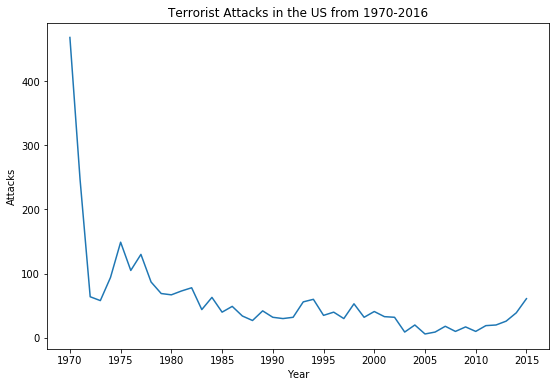

In [6]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(terror_year,terror_per_year)
plt.title('Terrorist Attacks in the US from 1970-2016')
plt.ylabel('Attacks')
plt.xlabel('Year')
plt.setp(ax,xticks=[1970,1975,1980,1985,1990,1995,2000,2005,2010,2015]) 
plt.show()
## Plot the terrorist activity in the US from 1970-2016

We used Matplotlib to graph the terrorist activity in the US from 1970-2016. Looking at the data, we see a sharp decline from 1970 and volatility throughout the majority of year. It does look like within the last 6 years we have see an increase in terrorist activity; however, an overall decrease. 

## Identifying Activity by State

In [7]:
## Identifying activity by state
df_us_state = df_us[['id','year','month','day','country','state','latitude','longitude','success','killed','injured']]
df_us_state.head(n=5)

,id,year,month,day,country,state,latitude,longitude,success,killed,injured
5,197001010002,1970,1,1,United States,Illinois,37.005105,-89.176269,1,0,0
7,197001020002,1970,1,2,United States,California,37.805065,-122.273024,1,0,0
8,197001020003,1970,1,2,United States,Wisconsin,43.076592,-89.412488,1,0,0
9,197001030001,1970,1,3,United States,Wisconsin,43.072950,-89.386694,1,0,0
10,197001050001,1970,1,1,United States,Wisconsin,43.468500,-89.744299,0,0,0


In [8]:
#Checking null values
df_us_state[df_us_state.isnull().any(axis = 1)]

,id,year,month,day,country,state,latitude,longitude,success,killed,injured
3414,197601010002,1976,1,1,United States,Unknown,NaN,NaN,0,0,0


In [9]:
df_us_state = df_us_state.dropna(axis = 0)

In [10]:
df_us_state.head()

,id,year,month,day,country,state,latitude,longitude,success,killed,injured
5,197001010002,1970,1,1,United States,Illinois,37.005105,-89.176269,1,0,0
7,197001020002,1970,1,2,United States,California,37.805065,-122.273024,1,0,0
8,197001020003,1970,1,2,United States,Wisconsin,43.076592,-89.412488,1,0,0
9,197001030001,1970,1,3,United States,Wisconsin,43.072950,-89.386694,1,0,0
10,197001050001,1970,1,1,United States,Wisconsin,43.468500,-89.744299,0,0,0


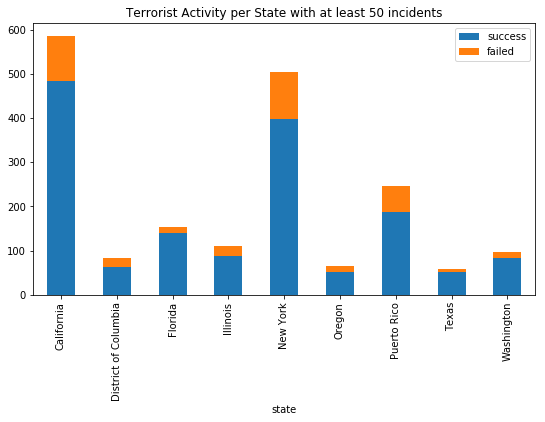

In [11]:
df_us_state['day'][df_us_state.day == 0] = 1
df_us_state['month'][df_us_state.month == 0] = 1
df_us_state['date'] = pd.to_datetime(df_us_state[['day', 'month', 'year']])
count_by_state = df_us_state[df_us_state.success== 1].groupby('state').count()['date']

df1=pd.DataFrame(index=count_by_state[count_by_state>50].index.unique())
df1["success"]= df_us_state[df_us_state.success== 1].groupby('state')['date'].count().fillna(0)
df1["failed"]= df_us_state[df_us_state.success!= 1].groupby('state')['date'].count().fillna(0).sort_values(0,ascending=False)
df1[df1.failed>0].plot(kind='bar', stacked=True, figsize=(9,5), title='Terrorist Activity per State with at least 50 incidents')

In [12]:
pd.crosstab(df_us_state["success"],df_us_state["state"],margins=True)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All
success,,,,,,,,,,,,,,,,,,,,,
0,1,0,7,1,101,3,2,0,19,14,...,1,8,2,1,6,14,1,9,1,483
1,14,1,27,4,485,41,15,3,64,139,...,21,51,18,4,33,84,1,28,1,2274
All,15,1,34,5,586,44,17,3,83,153,...,22,59,20,5,39,98,2,37,2,2757


Taking a look at successful terrorist attacks by state compared to failed, we see that California, Florida, New York and Puerto Rico have incredibly high rates of terrorist activity from 1970-2016. We do also see a higher percentages of successful terrorist attacks compared to failed terrorist attacks. 

## Identifying Target locations in the US

In [13]:
df_us.target.unique()

array(['Police', 'Utilities', 'Military', 'Government (General)',
       'Business', 'Educational Institution', 'Violent Political Party',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Unknown', 'Transportation', 'NGO', 'Telecommunication',
       'Government (Diplomatic)', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Journalists & Media',
       'Airports & Aircraft', 'Tourists', 'Maritime', 'Abortion Related'], dtype=object)

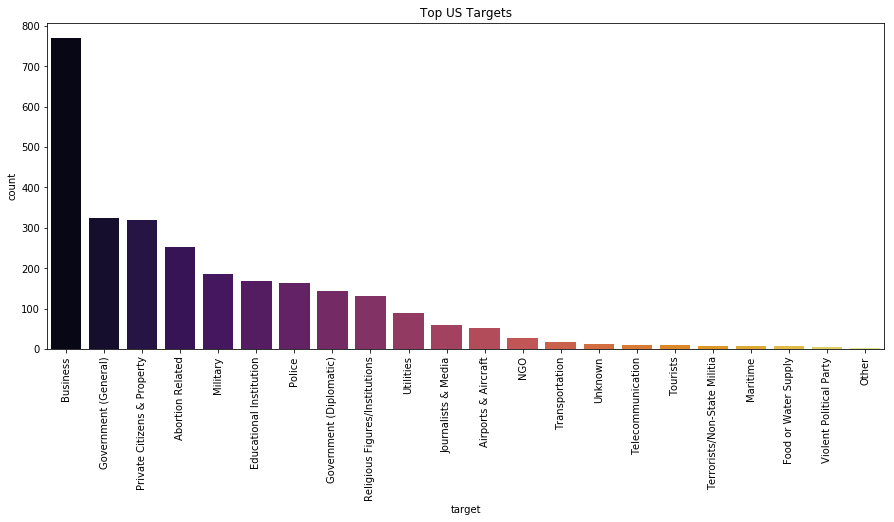

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(df_us['target'],palette='inferno',order=df_us['target'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top US Targets')
plt.show()

/Users/allisonhay/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/allisonhay/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


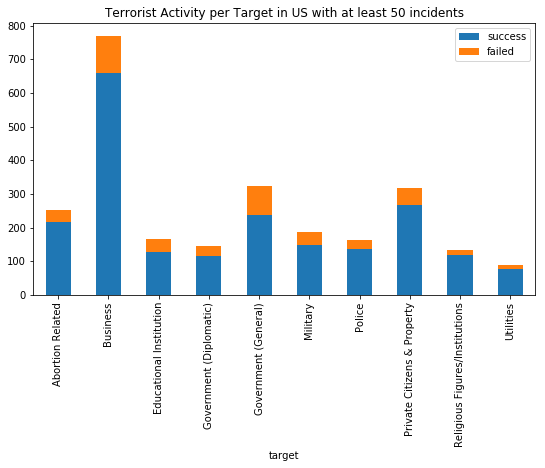

In [15]:
df_us['day'][df_us.day == 0] = 1
df_us['month'][df_us.month == 0] = 1
df_us['date'] = pd.to_datetime(df_us[['day', 'month', 'year']])
count_by_target = df_us[df_us.success== 1].groupby('target').count()['date']

df2=pd.DataFrame(index=count_by_target[count_by_target>50].index.unique())
df2["success"]= df_us[df_us.success== 1].groupby('target')['date'].count().fillna(0)
df2["failed"]= df_us[df_us.success!= 1].groupby('target')['date'].count().fillna(0).sort_values(0,ascending=False)
df2[df2.failed>0].plot(kind='bar', stacked=True, figsize=(9,5), title='Terrorist Activity per Target in US with at least 50 incidents')

We are seeing that Businesses tend to have a siginficant number of terrorist events as well as Government(General) and Private Citizens & Property. I will say it is interesting to see how much higher failed attempts are for Businesses and Government attacks. From here, I want to briefly dive into Businesses as that is a very vague definition. 

In [16]:
df_us_target1 = df_us[df_us.target == 'Business']
df_us_target1.head()

,id,year,month,day,country,state,city,latitude,longitude,success,target,target_sub,weapon,weapon_sub,killed,injured,date
14,197001090002,1970,1,9,United States,Puerto Rico,Rio Piedras,18.399712,-66.049987,1,Business,Retail/Grocery/Bakery,Incendiary,Arson/Fire,0,0,1970-01-09
18,197001120002,1970,1,12,United States,Puerto Rico,Rio Grande,18.379998,-65.830948,1,Business,Multinational Corporation,Explosives/Bombs/Dynamite,Unknown Explosive Type,0,0,1970-01-12
19,197001130001,1970,1,13,United States,Washington,Seattle,47.603560,-122.329439,1,Business,Retail/Grocery/Bakery,Incendiary,Molotov Cocktail/Petrol Bomb,0,0,1970-01-13
37,197001300002,1970,1,30,United States,Nebraska,South Sioux City,42.466340,-96.414050,1,Business,Retail/Grocery/Bakery,Explosives/Bombs/Dynamite,Dynamite/TNT,0,0,1970-01-30
43,197002020001,1970,2,2,United States,New York,New York City,40.783060,-73.971249,0,Business,Retail/Grocery/Bakery,Incendiary,Gasoline or Alcohol,0,0,1970-02-02


In [17]:
#I am cleaning the sub target names to make them look prettier as well as replace NaN with Unknown. For this exercise, I do not want to remove the NaN but rather state them as Uknown. 
df_us_target1.target_sub.unique()

array(['Retail/Grocery/Bakery', 'Multinational Corporation',
       'Hotel/Resort', 'Bank/Commerce', 'Construction', nan, 'Gas/Oil',
       'Entertainment/Cultural/Stadium/Casino', 'Restaurant/Bar/Caf\xe9',
       'Industrial/Textiles/Factory', 'Farm/Ranch',
       'Medical/Pharmaceutical', 'Private Security Company/Firm'], dtype=object)

In [18]:
df_us_target1.target_sub = df_us_target1.target_sub.fillna('Unknown')
df_us_target1.target_sub.replace('Restaurant/Bar/Caf\xe9','Restaurant', inplace =True)
df_us_target1.target_sub.unique()

/Users/allisonhay/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/allisonhay/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array(['Retail/Grocery/Bakery', 'Multinational Corporation',
       'Hotel/Resort', 'Bank/Commerce', 'Construction', 'Unknown',
       'Gas/Oil', 'Entertainment/Cultural/Stadium/Casino', 'Restaurant',
       'Industrial/Textiles/Factory', 'Farm/Ranch',
       'Medical/Pharmaceutical', 'Private Security Company/Firm'], dtype=object)

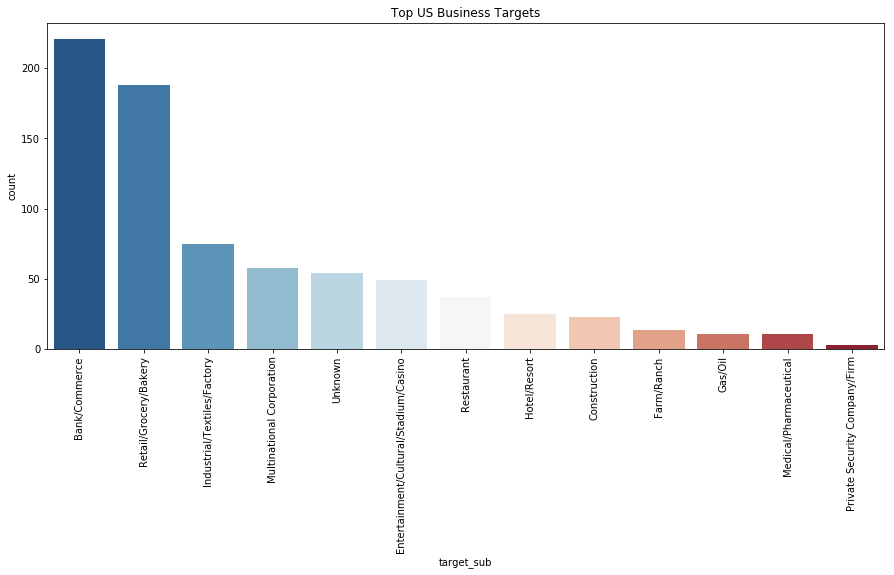

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(df_us_target1['target_sub'],palette='RdBu_r',order=df_us_target1['target_sub'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top US Business Targets')
plt.show()

Within the Business category, it looks like Banks and Retail venues have the most attacks. This was unexpected as I would have thought Entertainment, Restaurants or Hotels might be higher as the would be tourist locations. 

## Identifying Top Weapons used in US Terrorist Events

In [20]:
#Cleaning titles as we want to avoid any NaN. 
df_us.weapon.unique()

array(['Firearms', 'Explosives/Bombs/Dynamite', 'Incendiary', 'Chemical',
       'Fake Weapons', 'Melee', 'Sabotage Equipment', 'Unknown', 'Other',
       'Biological', 'Radiological',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], dtype=object)

In [21]:
df_us.weapon.replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle', inplace=True)
df_us.weapon.unique()

array(['Firearms', 'Explosives/Bombs/Dynamite', 'Incendiary', 'Chemical',
       'Fake Weapons', 'Melee', 'Sabotage Equipment', 'Unknown', 'Other',
       'Biological', 'Radiological', 'Vehicle'], dtype=object)

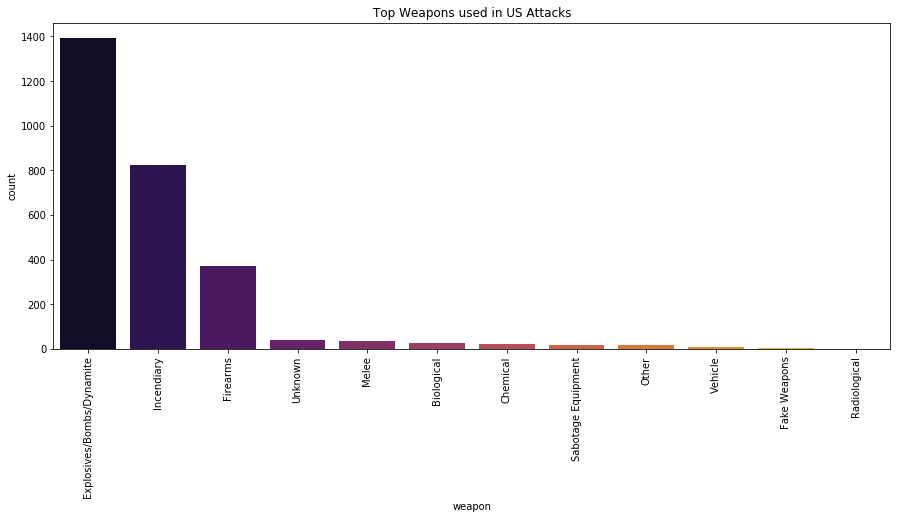

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(df_us['weapon'],palette='inferno',order=df_us['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top Weapons used in US Attacks')
plt.show()

We see that Explosives, Incendiary and Firearms are the three most common weapon used in US Attacks. Let's compare more about success vs failure of the attack. 

/Users/allisonhay/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/allisonhay/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


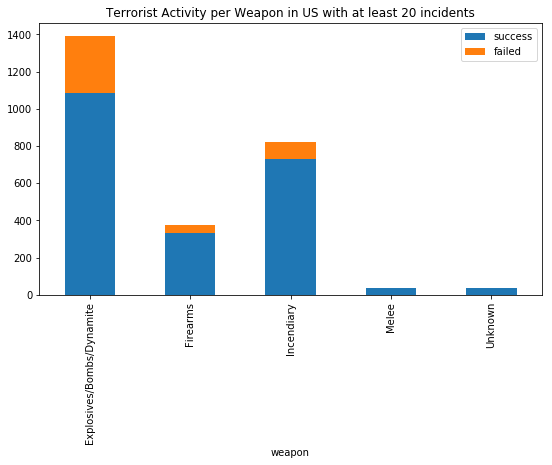

In [23]:
df_us['day'][df_us.day == 0] = 1
df_us['month'][df_us.month == 0] = 1
df_us['date'] = pd.to_datetime(df_us[['day', 'month', 'year']])
count_by_weapon = df_us[df_us.success== 1].groupby('weapon').count()['date']

df3=pd.DataFrame(index=count_by_weapon[count_by_weapon>20].index.unique())
df3["success"]= df_us[df_us.success== 1].groupby('weapon')['date'].count().fillna(0)
df3["failed"]= df_us[df_us.success!= 1].groupby('weapon')['date'].count().fillna(0).sort_values(0,ascending=False)
df3[df3.failed>0].plot(kind='bar', stacked=True, figsize=(9,5), title='Terrorist Activity per Weapon in US with at least 20 incidents')

We see how explosives do have a significant amount of failed attempts compared to Incendiary and Firearms rates. You will also note that the number of incidents per weapon dramatically drops after those three within the US. 

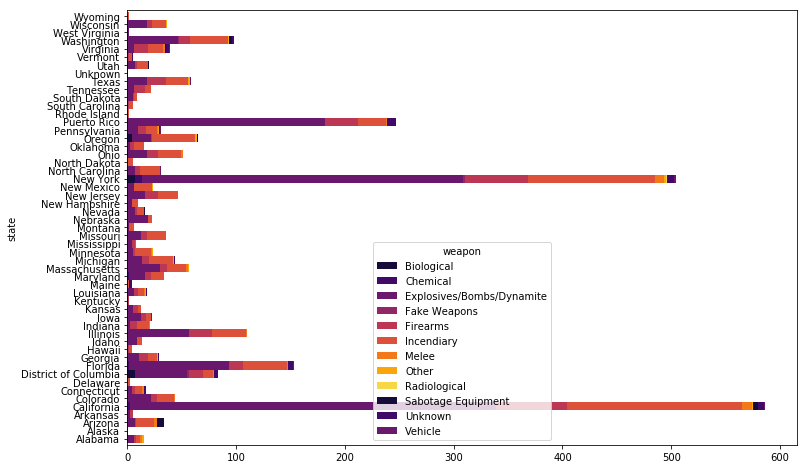

In [24]:
pd.crosstab(df_us.state,df_us.weapon).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

I wanted to examine which weapon was used per state. This also lets us see that Explosives, Incendiary, and Firearms are the three most prevelant weapons choices. From these three graphs, I can conclude that my hypothesis was correct - that Explosives are the more prevelant weapon of choice in the US. 

## Prediction Model for Terrorist Activity
Originally data set had data from 1970 however due the amount of variables a decision was made to start from 2010 onwards. More relevant for modern times. 

In [60]:
df_prediction = df_us[['id','year','month','day','state','success','target','weapon']]
df_prediction = df_prediction[df_prediction['year']>= 2010]
df_prediction.reset_index(drop=True , inplace=True)
df_prediction

,id,year,month,day,state,success,target,weapon
0,201002170017,2010,2,17,Florida,1,Business,Chemical
1,201002180013,2010,2,18,Texas,1,Government (General),Vehicle (not to include vehicle-borne explosiv...
2,201002250007,2010,2,25,New York,0,Transportation,Explosives/Bombs/Dynamite
3,201003040016,2010,3,4,Virginia,1,Government (General),Firearms
4,201004300006,2010,4,30,Colorado,1,Business,Incendiary
5,201005010001,2010,5,1,New York,0,Private Citizens & Property,Explosives/Bombs/Dynamite
6,201005100042,2010,5,10,Florida,1,Religious Figures/Institutions,Explosives/Bombs/Dynamite
7,201006050014,2010,6,5,Utah,1,Business,Incendiary
8,201007070017,2010,7,7,Utah,1,Business,Incendiary
9,201007270013,2010,7,27,Oregon,1,Business,Incendiary


In [26]:
features=pd.concat( [pd.get_dummies(df_prediction['state'],prefix='stt'),
                     pd.get_dummies(df_prediction['weapon'],prefix='wpn'),
                     pd.get_dummies(df_prediction['target'],prefix='tgt'),
                    ],axis=1)

In [27]:
col_to_keep = ['success']
predicts_df = df_prediction[col_to_keep].join(features.ix[:,'stt_Arizona':])
predicts_df.head()

/Users/allisonhay/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,success,stt_Arizona,stt_California,stt_Colorado,stt_Connecticut,stt_District of Columbia,stt_Florida,stt_Georgia,stt_Idaho,stt_Illinois,...,tgt_Journalists & Media,tgt_Military,tgt_NGO,tgt_Other,tgt_Police,tgt_Private Citizens & Property,tgt_Religious Figures/Institutions,tgt_Transportation,tgt_Unknown,tgt_Utilities
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
predict_df = predicts_df.copy()

In [29]:
df_success = predicts_df.corr()

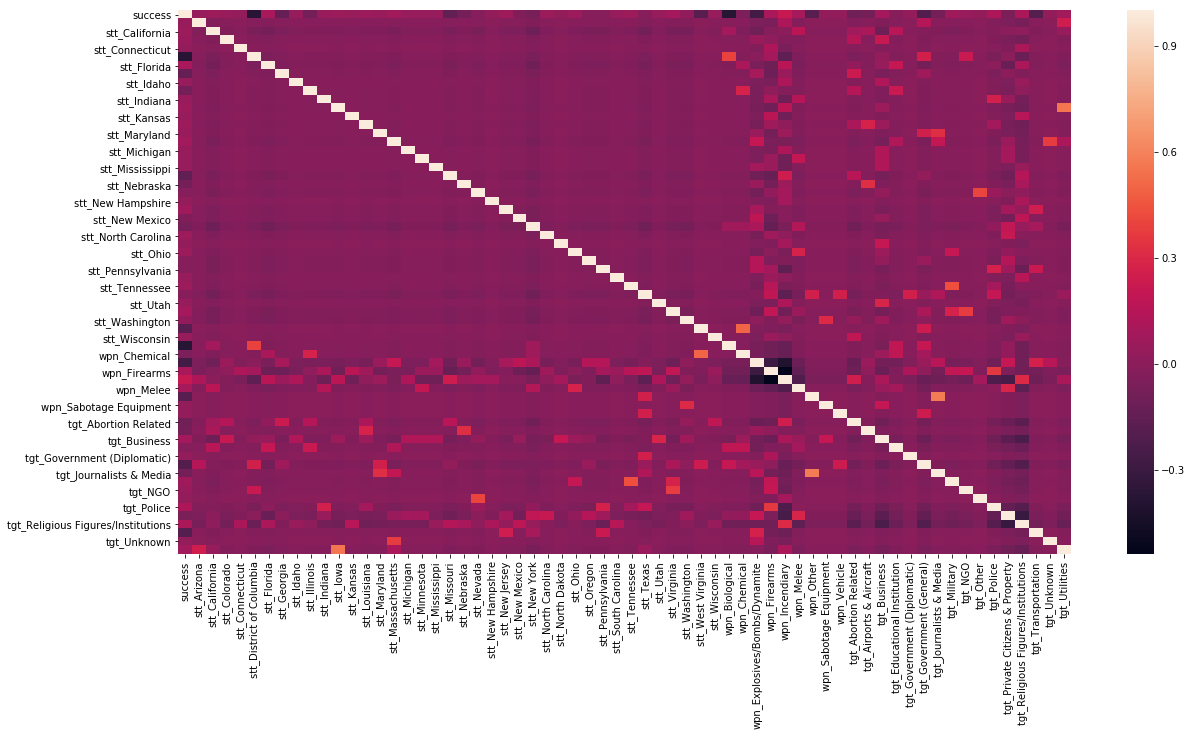

In [30]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_success)

In [31]:
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

/Users/allisonhay/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
model = DecisionTreeClassifier()

X = predict_df
y = X['success']
X.drop('success', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
##Test size 0.33-0.4
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=4)

print('CV AUC {}, Average AUG{}'.format(scores, scores.mean()))
print('CV AUC:'+ str(scores), 'Average AUC:'+ str(scores.mean()))

CV AUC [ 0.63218391  0.6091954   0.72988506  0.48275862], Average AUG0.613505747126
('CV AUC:[ 0.63218391  0.6091954   0.72988506  0.48275862]', 'Average AUC:0.613505747126')


In [61]:
model = RandomForestClassifier(n_estimators = 25, max_depth=50)
    
model.fit(X_train, y_train)

scores1 = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=4)

print('CV AUC {}, Average AUG{}'.format(scores1, scores1.mean()))
print('CV AUC:'+ str(scores1), 'Average AUC:'+ str(scores1.mean()))

CV AUC [ 0.741  0.667  0.713  0.54 ], Average AUG0.665229885057
('CV AUC:[ 0.741  0.667  0.713  0.54 ]', 'Average AUC:0.665229885057')


In [36]:
features = X_train.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(n=15)

,Features,Importance Score
60,tgt_Transportation,0.149891
38,wpn_Biological,0.097542
4,stt_District of Columbia,0.079887
59,tgt_Religious Figures/Institutions,0.070364
8,stt_Illinois,0.062783
18,stt_Missouri,0.062756
40,wpn_Explosives/Bombs/Dynamite,0.057272
47,tgt_Abortion Related,0.048683
6,stt_Georgia,0.045236
58,tgt_Private Citizens & Property,0.038237


In [37]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [39]:
precision_score(y_test, y_pred)

0.81967213114754101

In [40]:
recall_score(y_test, y_pred)

0.98039215686274506

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

In [45]:
print cnf_matrix

[[ 2 11]
 [ 1 50]]


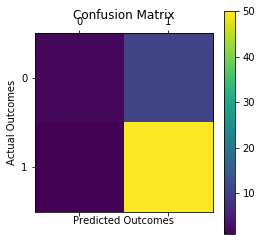

In [46]:
plt.matshow(cnf_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual Outcomes')
plt.xlabel('Predicted Outcomes')
plt.show()

Looking at the test data, we can see that there is a 82% precision score for the model and a 98% recall score. I can confirm the precision score does increase if we reduce the test size; however, I think 33% is a good test size and allows enough variables to test with. I am happy with the precision score for now as it is within the 80-90% range. We would not necessarily have any suggestion of overfitting for this model and it can be a good predictor. The confusion matrix can also demonstrate how the model predicts successful vs failed terrorist events. While there are only two variables to consider for this model, we can see how well the model can predict success of an attack and identify failed attacks. 